In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def hypothetical_classifier(targets, prob_correct):
    """
    A simple binary classifier that take in targetss
    and returns correct low confidence scores.
    
    :param targets: The input targets (0 or 1).
    :return: A tuple of (targets, confidence_score), where confidence_score is close to 0.5.
    """
    num_inputs = len(targets)
    incorrect_indices = np.random.uniform(0, 1, num_inputs) > prob_correct
    targets = np.array(targets)
    targets[incorrect_indices] = 1 - targets[incorrect_indices] # make incorrect prediction

    estimated_probabilities = np.zeros((num_inputs, 2))
    # CP does not assume distribution. Uniform distribution is selected for conveninetcy.
    estimated_probabilities[range(num_inputs), targets] = 0.55 + np.random.uniform(-0.04, 0.05, num_inputs) 
    estimated_probabilities[range(num_inputs), 1 - targets] = 1 - estimated_probabilities[range(num_inputs), targets]
    return estimated_probabilities

In [3]:
targets = [0, 1, 1, 0, 1, 0, 0, 0]
prob_correct = 1
y_pred = hypothetical_classifier(targets, prob_correct) # y_pred = y_hat
y_pred

array([[0.56313611, 0.43686389],
       [0.48248728, 0.51751272],
       [0.43081435, 0.56918565],
       [0.57980551, 0.42019449],
       [0.46175283, 0.53824717],
       [0.5214153 , 0.4785847 ],
       [0.52937009, 0.47062991],
       [0.53381554, 0.46618446]])

# Least Ambiguous set-valued Classifier (LAC)

## Overview

Here is the overview of how LAC method work. You guys can play around with ALPHA ($\alpha$) and prob_correct to see that coverage always hold with inefficiecy tradeoff.

In [4]:
targets = [0]*200 + [1]*200 # calibration and testing on same set. Theorically fine.

# hyperparameters
ALPHA = 0.1 
prob_correct = 0.2

# model making predictions.
predictions = hypothetical_classifier(targets, prob_correct)

# LAC method
nonconformity_scores = predictions[range(len(targets)), targets] # confidence on correct label
qhat = np.quantile(nonconformity_scores, q=ALPHA)
set_predictions = predictions > qhat # inference

# Evaluate
## accuracy
correct_prediction = np.equal(predictions.argmax(axis=1), targets)
accuracy = correct_prediction.sum() / len(targets)

## coverage
coverage = set_predictions[range(len(targets)), targets]
coverage = coverage.sum() / len(targets)

## inefficiency
inefficiency = set_predictions.sum() / len(targets)

print("The hypothetical model has the accuracy of {}".format(accuracy))
print("The hypothetical model has the coverage of {}".format(coverage))
print("The hypothetical model has the inefficiency of {}".format(inefficiency))

The hypothetical model has the accuracy of 0.205
The hypothetical model has the coverage of 0.9
The hypothetical model has the inefficiency of 1.8625


LAC method simply include outputs with confidence greater than the quantile.

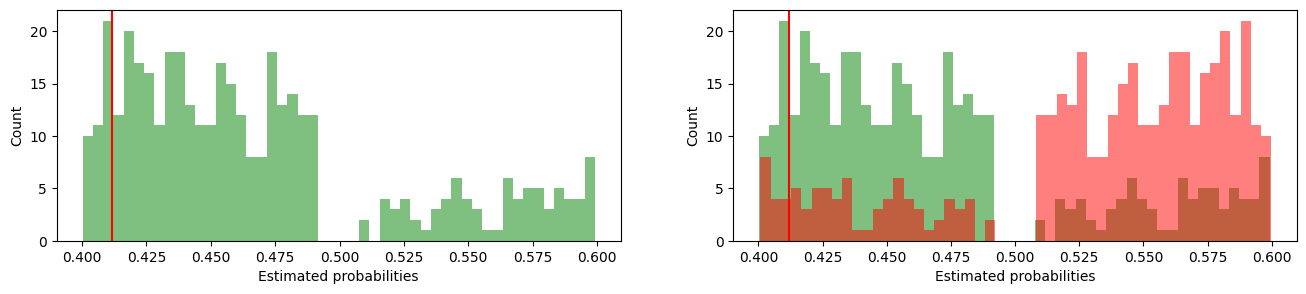

In [5]:
est_prob_inv = 1 - nonconformity_scores # estimated probabilities of the incorrect classes

# Plotting
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")

plt.subplot(1, 2, 2)
plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.hist(est_prob_inv, bins=50, color='r', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")
plt.show()

In [6]:
table = pd.DataFrame(zip(targets, predictions.argmax(axis=1), set_predictions), 
                     columns=['targets', 'predictions', 'predictions set'])
table.sample(10)

,targets,predictions,predictions set
135,0,0,"[True, False]"
298,1,0,"[True, True]"
178,0,1,"[True, True]"
17,0,1,"[True, True]"
68,0,1,"[True, True]"
399,1,0,"[True, True]"
92,0,1,"[True, True]"
46,0,0,"[True, True]"
236,1,0,"[True, False]"
218,1,0,"[True, True]"


1) since the model is always correct, confidence threshold will be high.
2) since the model is always wrong, confidence threshold will be low.

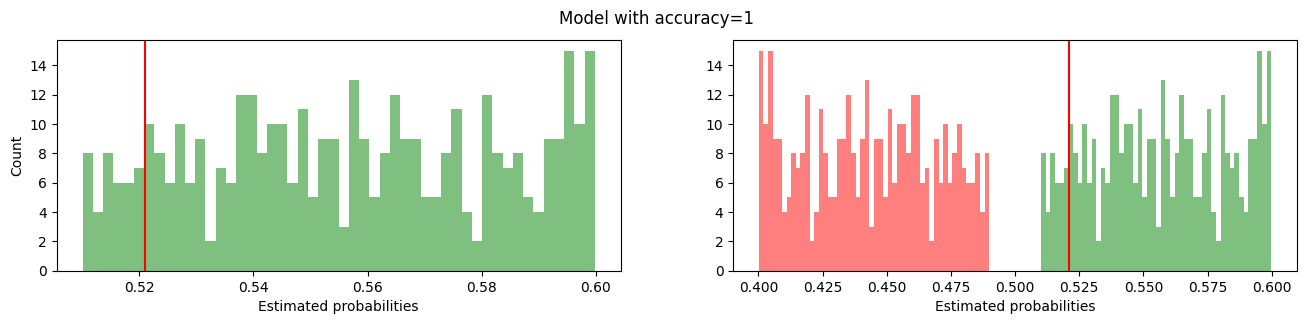

Model with 100% accuracy: since model always more confidence in the correct class, the prediction set will never include the incorrect class and include correct class 1-alpha of the time  


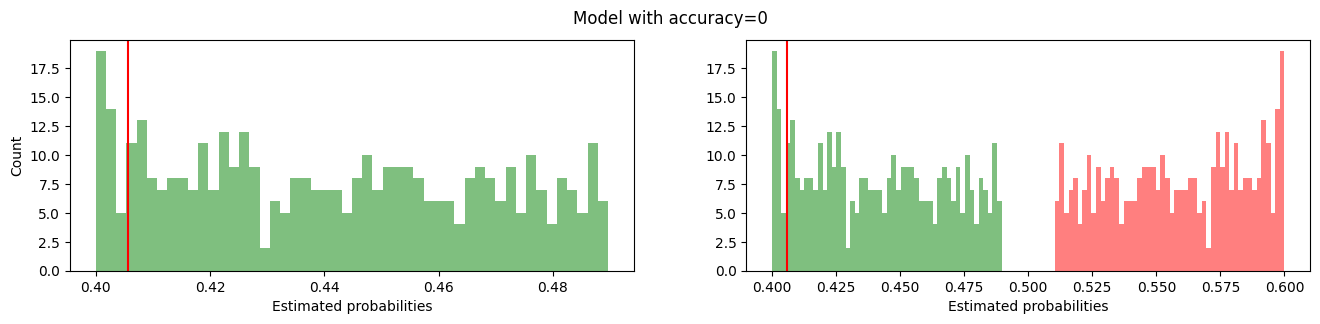

Model with 0% accuracy: since model always more confidence in the incorrect class, the incorrect class always get included in the prediction set.
However, note that we still obtain 1-alpha coverage since the quantile is referenced to the correct prediction.


In [7]:
prob_corrects = [1, 0]
descriptions = [
    "Model with 100% accuracy: since model always more confidence in the correct class, the prediction set will never include the incorrect class and include correct class 1-alpha of the time  ",
    "Model with 0% accuracy: since model always more confidence in the incorrect class, the incorrect class always get included in the prediction set.\nHowever, note that we still obtain 1-alpha coverage since the quantile is referenced to the correct prediction."
]


for prob_correct, description in zip(prob_corrects, descriptions):
    # model making predictions.
    predictions = hypothetical_classifier(targets, prob_correct)

    # LAC method
    nonconformity_scores = predictions[range(len(targets)), targets] # confidence on correct label
    est_prob_inv = 1 - nonconformity_scores # estimated probabilities of the incorrect classes
    qhat = np.quantile(nonconformity_scores, q=ALPHA)
    set_predictions = predictions > qhat # inference

    # Plotting
    plt.figure(figsize=(16, 3))
    plt.subplot(1, 2, 1)
    plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
    plt.axvline(qhat, c='r')
    plt.ylabel("Count")
    plt.xlabel("Estimated probabilities")

    plt.subplot(1, 2, 2)
    plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
    plt.hist(est_prob_inv, bins=50, color='r', alpha=0.5)
    plt.axvline(qhat, c='r')
    plt.xlabel("Estimated probabilities")
    
    plt.suptitle("Model with accuracy={}".format(prob_correct))
    plt.show()
    print(description)

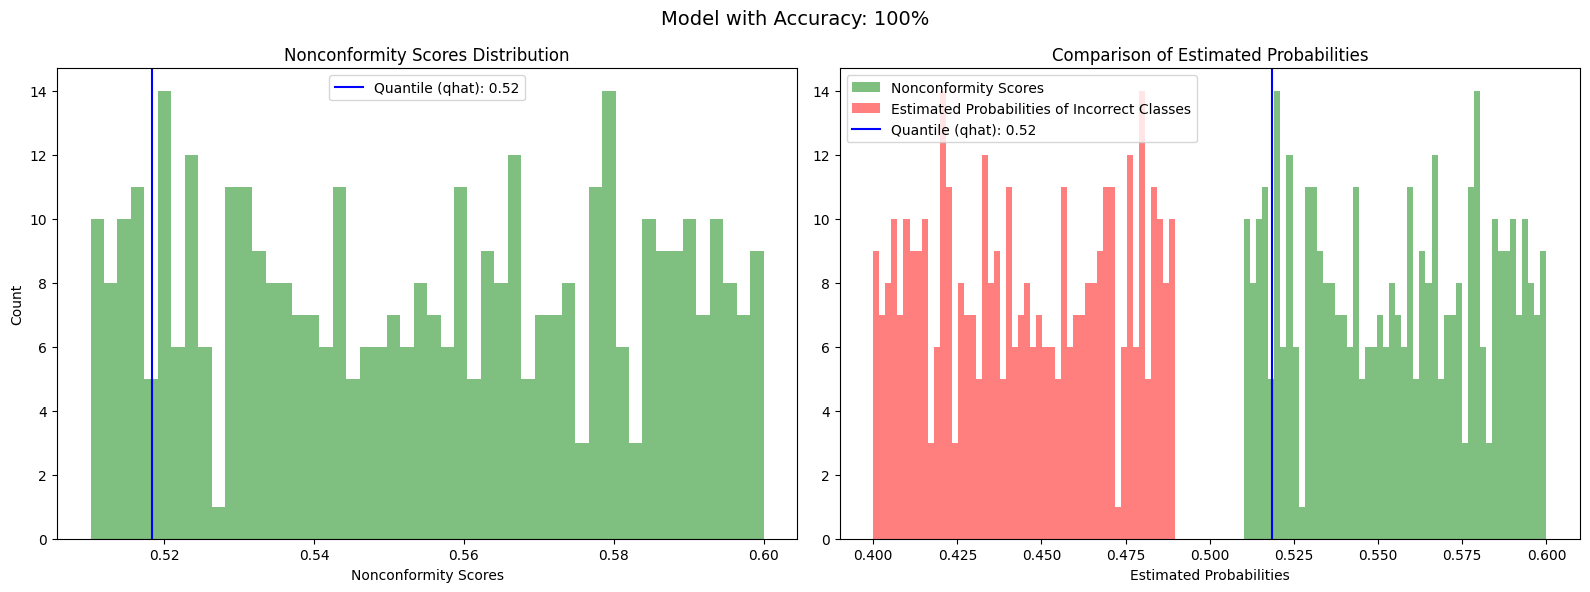

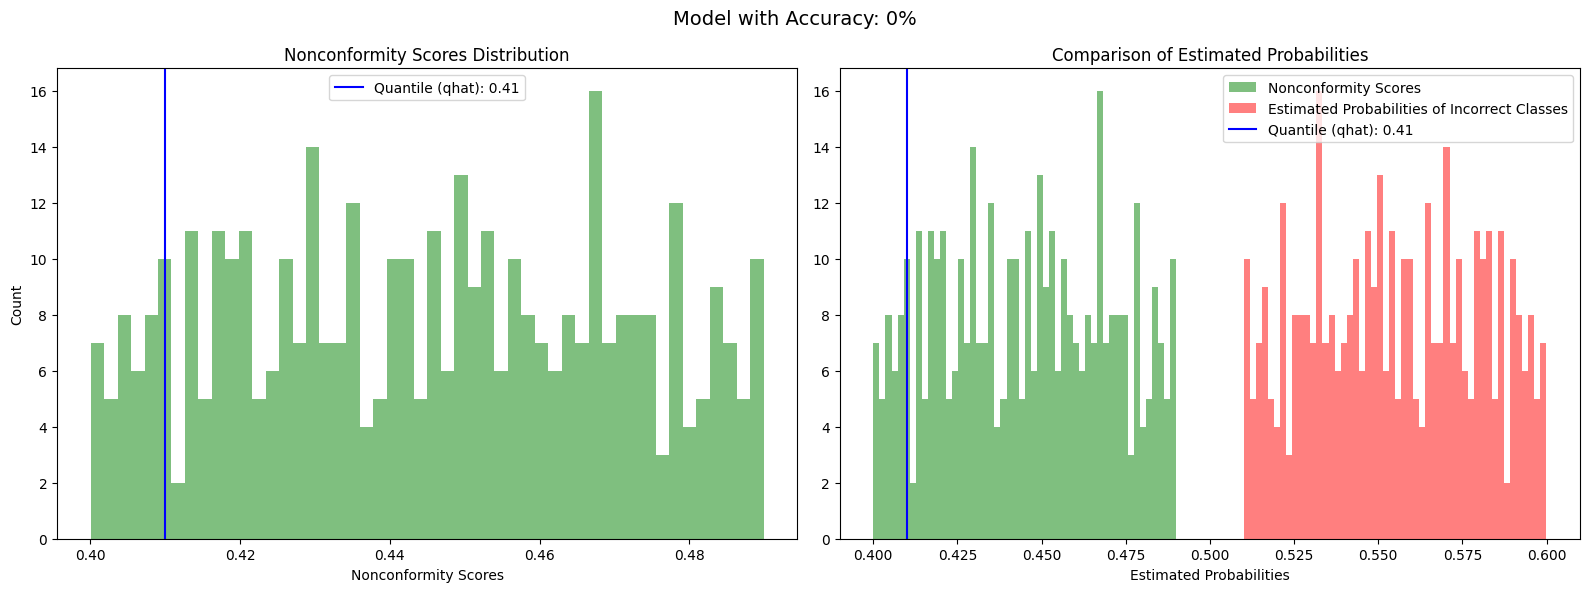

In [8]:
prob_corrects = [1, 0]
descriptions = [
    "Model with 100% accuracy: since model always more confidence in the correct class, the prediction set will never include the incorrect class and include correct class 1-alpha of the time  ",
    "Model with 0% accuracy: since model always more confidence in the incorrect class, the incorrect class always get included in the prediction set.\nHowever, note that we still obtain 1-alpha coverage since the quantile is referenced to the correct prediction."
]

for prob_correct, description in zip(prob_corrects, descriptions):
    predictions = hypothetical_classifier(targets, prob_correct)
    nonconformity_scores = predictions[range(len(targets)), targets]
    est_prob_inv = 1 - nonconformity_scores
    qhat = np.quantile(nonconformity_scores, q=ALPHA)

    # Plotting
    plt.figure(figsize=(16, 6))

    # Nonconformity scores histogram
    plt.subplot(1, 2, 1)
    plt.hist(nonconformity_scores, bins=50, color='green', alpha=0.5)
    plt.axvline(qhat, color='blue', label=f'Quantile (qhat): {qhat:.2f}')
    plt.ylabel("Count")
    plt.xlabel("Nonconformity Scores")
    plt.title("Nonconformity Scores Distribution")
    plt.legend()

    # Overlaying histograms
    plt.subplot(1, 2, 2)
    plt.hist(nonconformity_scores, bins=50, color='green', alpha=0.5, label='Nonconformity Scores')
    plt.hist(est_prob_inv, bins=50, color='red', alpha=0.5, label='Estimated Probabilities of Incorrect Classes')
    plt.axvline(qhat, color='blue', label=f'Quantile (qhat): {qhat:.2f}')
    plt.xlabel("Estimated Probabilities")
    plt.title("Comparison of Estimated Probabilities")
    plt.legend()
    
    # plt.figtext(0.5, -0.05, description, wrap=True, horizontalalignment='center', fontsize=12)
    plt.suptitle(f"Model with Accuracy: {prob_correct * 100}%", fontsize=14)
    plt.tight_layout()
    plt.show()